In [264]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# 1. Load the Datasets
df = pd.read_csv('hair_fall.csv')
df1 = pd.read_csv('hairfall2.csv')
df2 = pd.read_csv('hairfall3.csv')


from sklearn.preprocessing import LabelEncoder

# Rename the column
df2.rename(columns={'Do you have hair fall problem ?': 'Hair Loss'}, inplace=True)

# List of columns to label encode
columns_to_encode = [
    'What is your name ?', 'What is your gender ?', 'Hair Loss',
    'Is there anyone in your family having a hair fall problem or a baldness issue?',
    'Did you face any type of chronic illness in the past?', 'Do you stay up late at night?',
    'Do you have any type of sleep disturbance?', 'Do you think that in your area water is a reason behind hair fall problems?',
    'Do you use chemicals, hair gel, or color in your hair?', 'Do you have anemia?',
    'Do you have too much stress', 'What is your food habit'
]

# Initialize the label encoder
le = LabelEncoder()

# Apply label encoding to each column
for column in columns_to_encode:
    df2[column] = le.fit_transform(df2[column])

df2.head()

df2.drop(columns=['Timestamp', 'What is your name ?'], inplace=True)

df['Label'] = df['Hair Loss']
df1['Label'] = df1['Label']  # Already named correctly in df1


df1.rename(columns={'Age(Yrs.)': 'Age'}, inplace=True)  # Align target column name
df2.rename(columns={'What is your age ?': 'Age', 'What is your gender ?': 'Gender', 'Hair Loss': 'Label'}, inplace=True) 

In [265]:
df1['Enviromental_factor'] = df1['Radiation']

In [266]:
df1.columns

Index(['Gender', 'Age', 'Marital_Status', 'Father', 'Mother', 'Grand_Father',
       'Grand_Mother', 'Siblings', 'Pregnant', 'Radiation', 'Hairline_Pattern',
       'Hairstyle', 'Density', 'Hair_Fall_Rate', 'Scalp_Infection',
       'Pain_Itch', 'Nutrition', 'Weight_Loss', 'Sleeping_Pattern',
       'Chemical_Products', 'Medication', 'Region', 'Label',
       'Enviromental_factor'],
      dtype='object')

In [267]:
df.columns

Index(['Id', 'Genetics', 'Hormonal Changes', 'Medical Conditions',
       'Medications & Treatments', 'Nutritional Deficiencies', 'Stress', 'Age',
       'Poor Hair Care Habits', 'Environmental Factors', 'Smoking',
       'Weight Loss', 'Hair Loss', 'Label'],
      dtype='object')

In [268]:
import pandas as pd


# Renaming columns in df1
df.rename(columns={
    'Medications & Treatments': 'Medication',
    'Nutritional Deficiencies': 'Nutrition',
    'Environmental Factors': 'Enviromental_factor'
}, inplace=True)

# Renaming columns in df2
df2.rename(columns={
    'Do you have too much stress': 'Stress',
    'What is your food habit': 'Food_Habit',
    'Is there anyone in your family having a hair fall problem or a baldness issue?': 'Genetics',
    'Do you stay up late at night?': 'Sleeping_Pattern',
    'Do you use chemicals, hair gel, or color in your hair?':  'Chemical_Products'

}, inplace=True)



df.drop(columns=['Hair Loss','Id'], inplace=True)

df1.drop(columns=['Region','Radiation'], inplace=True)



In [269]:
df.columns

Index(['Genetics', 'Hormonal Changes', 'Medical Conditions', 'Medication',
       'Nutrition', 'Stress', 'Age', 'Poor Hair Care Habits',
       'Enviromental_factor', 'Smoking', 'Weight Loss', 'Label'],
      dtype='object')

In [270]:
df1.columns

Index(['Gender', 'Age', 'Marital_Status', 'Father', 'Mother', 'Grand_Father',
       'Grand_Mother', 'Siblings', 'Pregnant', 'Hairline_Pattern', 'Hairstyle',
       'Density', 'Hair_Fall_Rate', 'Scalp_Infection', 'Pain_Itch',
       'Nutrition', 'Weight_Loss', 'Sleeping_Pattern', 'Chemical_Products',
       'Medication', 'Label', 'Enviromental_factor'],
      dtype='object')

In [271]:
df2.columns

Index(['Age', 'Gender', 'Label', 'Genetics',
       'Did you face any type of chronic illness in the past?',
       'Sleeping_Pattern', 'Do you have any type of sleep disturbance?',
       'Do you think that in your area water is a reason behind hair fall problems?',
       'Chemical_Products', 'Do you have anemia?', 'Stress', 'Food_Habit'],
      dtype='object')

In [272]:


# Merge df1 and df2 on common columns (Age, Gender, Label, Sleeping_Pattern, Chemical_Products)
merged_df1 = pd.merge(df1, df2, on=['Age', 'Gender', 'Label', 'Sleeping_Pattern', 'Chemical_Products'], how='outer')

# Now merge the above result with df on common columns (Age, Label, Genetics, Stress)
main_data = pd.merge(merged_df1, df, on=['Age', 'Label', 'Genetics', 'Stress','Enviromental_factor','Medication','Nutrition'], how='outer')

In [273]:
main_data.columns

Index(['Gender', 'Age', 'Marital_Status', 'Father', 'Mother', 'Grand_Father',
       'Grand_Mother', 'Siblings', 'Pregnant', 'Hairline_Pattern', 'Hairstyle',
       'Density', 'Hair_Fall_Rate', 'Scalp_Infection', 'Pain_Itch',
       'Nutrition', 'Weight_Loss', 'Sleeping_Pattern', 'Chemical_Products',
       'Medication', 'Label', 'Enviromental_factor', 'Genetics',
       'Did you face any type of chronic illness in the past?',
       'Do you have any type of sleep disturbance?',
       'Do you think that in your area water is a reason behind hair fall problems?',
       'Do you have anemia?', 'Stress', 'Food_Habit', 'Hormonal Changes',
       'Medical Conditions', 'Poor Hair Care Habits', 'Smoking',
       'Weight Loss'],
      dtype='object')

In [274]:
from sklearn.utils import resample

# Assuming main_data is your merged dataset with 554 rows and 37 columns

# 1. Randomly resample (with replacement) to increase the number of rows
# Upsample to 30,000 rows using resampling

# Create a dataframe with 30000 rows by resampling with replacement
main_data = resample(main_data, 
                          replace=True,       # Sample with replacement
                          n_samples=30000,    # Increase number of rows to 30,000
                          random_state=42)    # For reproducibility

# 2. Noise Injection on Numerical Columns (e.g., Age, Genetics, Medication)
# Let's add random noise to numerical columns

numerical_columns = ['Age', 'Genetics', 'Medication', 'Enviromental_factor', 'Nutrition']  # Example numerical columns

for col in numerical_columns:
    noise = np.random.normal(0, 0.05, size=main_data[col].shape)  # Adding random noise with small standard deviation
    main_data[col] += noise  # Add the noise

# 3. For Categorical Data (Optional): Slightly modify categorical values to add variations
categorical_columns = ['Gender', 'Label', 'Sleeping_Pattern', 'Chemical_Products', 'Stress']  # Example categorical columns

for col in categorical_columns:
    main_data[col] = main_data[col].apply(lambda x: x if np.random.rand() > 0.05 else np.random.choice(main_data[col].unique()))

# Display the augmented dataset shape and a sample
print(main_data.shape)  # Should print (30000, 37)
print(main_data.head())  # Show first few rows of the augmented data


(30000, 34)
      Gender        Age  Marital_Status  Father  Mother  Grand_Father  \
860      1.0  30.096416             NaN     NaN     NaN           NaN   
1294     0.0  22.993082             NaN     NaN     NaN           NaN   
1130     0.0  27.974323             NaN     NaN     NaN           NaN   
1095     1.0  31.941719             NaN     NaN     NaN           NaN   
1638     NaN  37.006678             NaN     NaN     NaN           NaN   

      Grand_Mother  Siblings  Pregnant  Hairline_Pattern  ...  \
860            NaN       NaN       NaN               NaN  ...   
1294           NaN       NaN       NaN               NaN  ...   
1130           NaN       NaN       NaN               NaN  ...   
1095           NaN       NaN       NaN               NaN  ...   
1638           NaN       NaN       NaN               NaN  ...   

      Do you have any type of sleep disturbance?  \
860                                          1.0   
1294                                         1.0   
11

In [275]:
main_data

,Gender,Age,Marital_Status,Father,Mother,Grand_Father,Grand_Mother,Siblings,Pregnant,Hairline_Pattern,...,Do you have any type of sleep disturbance?,Do you think that in your area water is a reason behind hair fall problems?,Do you have anemia?,Stress,Food_Habit,Hormonal Changes,Medical Conditions,Poor Hair Care Habits,Smoking,Weight Loss
860,1.0,30.096416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,0.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN
1294,0.0,22.993082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1130,0.0,27.974323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN
1095,1.0,31.941719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN
1638,NaN,37.006678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,1.0,8.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246,1.0,18.993900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
746,1.0,25.023716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN
1147,1.0,26.039311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN
1002,0.0,20.908684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN


In [276]:
numerical_columns = ['Age', 'Hair_Fall_Rate']

# Fill numerical columns with median
main_data[numerical_columns] = main_data[numerical_columns].apply(lambda x: x.fillna(x.median()) if x.dtype != 'object' else x)

# Columns to treat as categorical (binary)
categorical_columns = ['Gender', 'Marital_Status', 'Father', 'Mother', 'Grand_Father', 'Grand_Mother', 'Siblings', 
                       'Pregnant', 'Nutrition','Hairline_Pattern', 'Hairstyle', 'Density', 'Scalp_Infection', 'Pain_Itch', 'Weight_Loss', 
                       'Sleeping_Pattern', 'Chemical_Products', 'Medication', 'Enviromental_factor', 'Genetics', 
                       'Did you face any type of chronic illness in the past?', 'Do you have any type of sleep disturbance?', 
                       'Do you think that in your area water is a reason behind hair fall problems?', 'Do you have anemia?', 
                       'Stress', 'Food_Habit', 'Hormonal Changes', 'Medical Conditions', 'Poor Hair Care Habits', 'Smoking', 'Weight Loss']

# Fill categorical columns (binary values) with mode
main_data[categorical_columns] = main_data[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))

# Check if there are still any missing values
print(main_data.isnull().sum())  

Gender                                                                         0
Age                                                                            0
Marital_Status                                                                 0
Father                                                                         0
Mother                                                                         0
Grand_Father                                                                   0
Grand_Mother                                                                   0
Siblings                                                                       0
Pregnant                                                                       0
Hairline_Pattern                                                               0
Hairstyle                                                                      0
Density                                                                        0
Hair_Fall_Rate              

In [277]:
main_data

,Gender,Age,Marital_Status,Father,Mother,Grand_Father,Grand_Mother,Siblings,Pregnant,Hairline_Pattern,...,Do you have any type of sleep disturbance?,Do you think that in your area water is a reason behind hair fall problems?,Do you have anemia?,Stress,Food_Habit,Hormonal Changes,Medical Conditions,Poor Hair Care Habits,Smoking,Weight Loss
860,1.0,30.096416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,2.0,1.0,5.0,0.0,1.0,0.0
1294,0.0,22.993082,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,1.0,0.0
1130,0.0,27.974323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0
1095,1.0,31.941719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,2.0,1.0,5.0,0.0,1.0,0.0
1638,0.0,37.006678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246,1.0,18.993900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,1.0,0.0
746,1.0,25.023716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0
1147,1.0,26.039311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0
1002,0.0,20.908684,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0


In [278]:
main_data.drop(columns=['Father', 'Mother', 'Grand_Father', 'Grand_Mother', 'Siblings'], inplace=True)

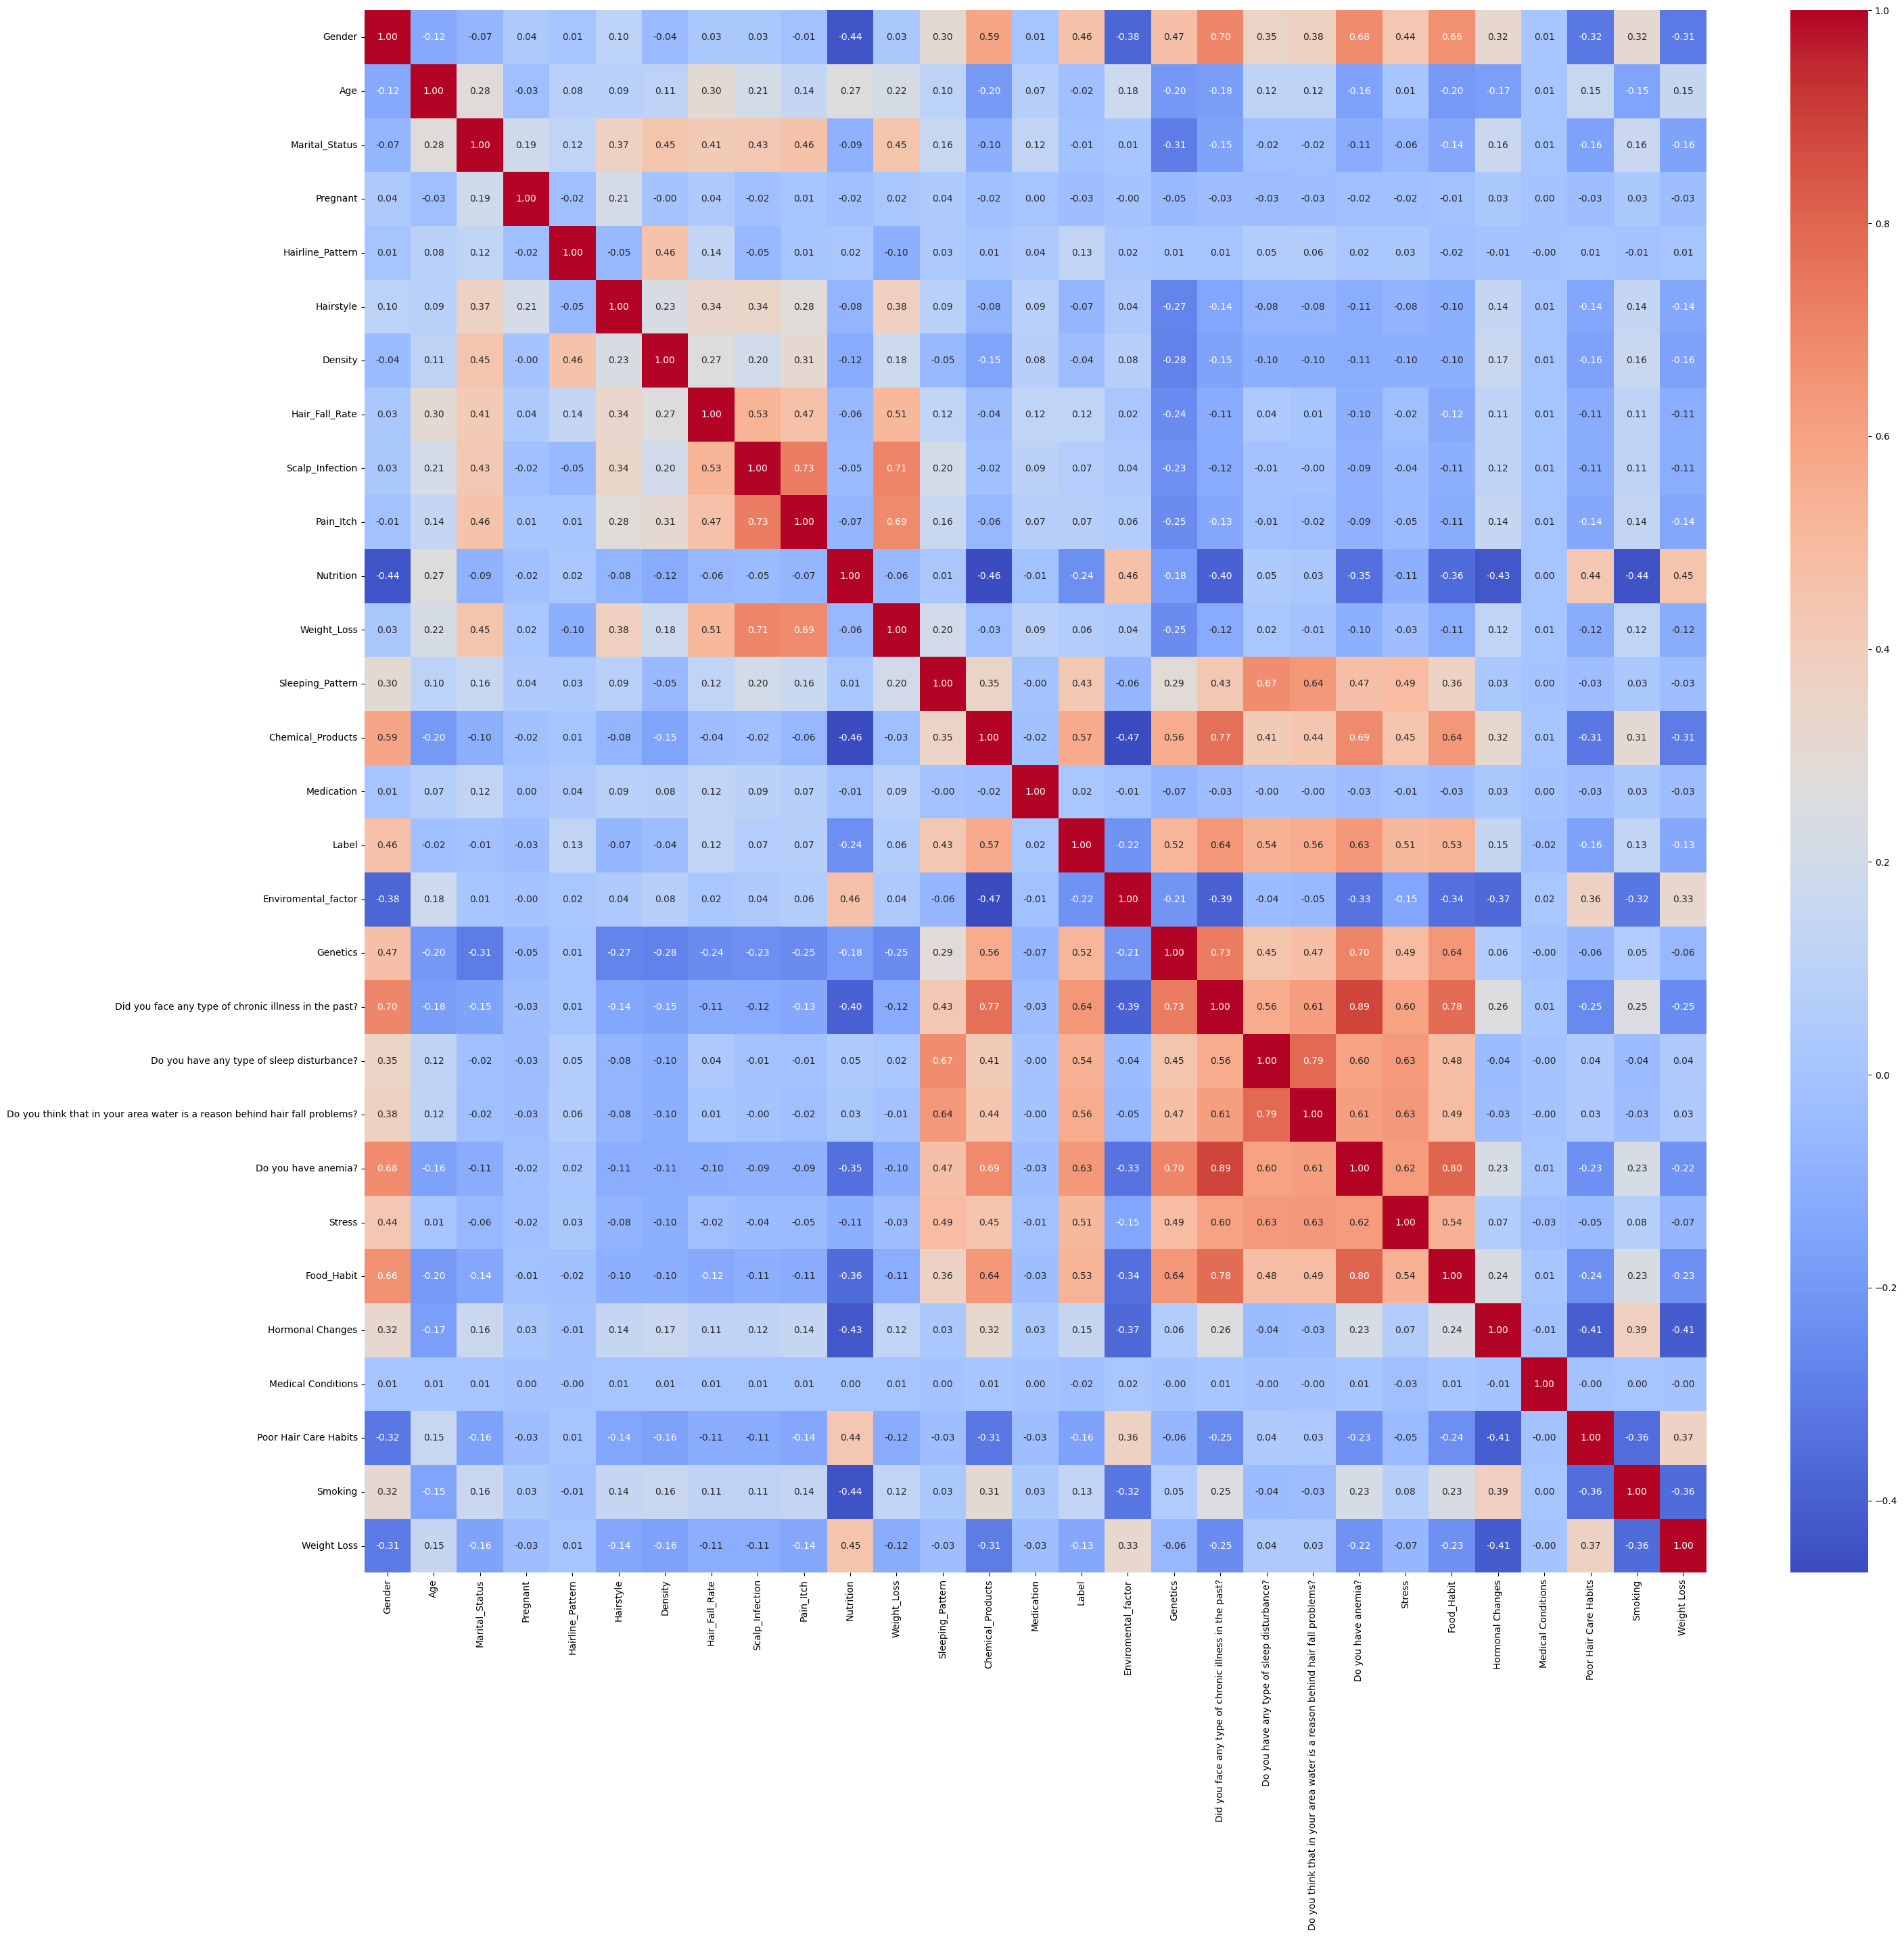

In [279]:
import seaborn as sns

import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = main_data.corr()

# Set the figure size
plt.figure(figsize=(32, 30))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Show the plot
plt.show()

In [280]:
main_data

,Gender,Age,Marital_Status,Pregnant,Hairline_Pattern,Hairstyle,Density,Hair_Fall_Rate,Scalp_Infection,Pain_Itch,...,Do you have any type of sleep disturbance?,Do you think that in your area water is a reason behind hair fall problems?,Do you have anemia?,Stress,Food_Habit,Hormonal Changes,Medical Conditions,Poor Hair Care Habits,Smoking,Weight Loss
860,1.0,30.096416,0.0,0.0,1.0,0.0,0.0,52.0,0.0,0.0,...,1.0,1.0,0.0,1.0,2.0,1.0,5.0,0.0,1.0,0.0
1294,0.0,22.993082,0.0,0.0,1.0,0.0,0.0,52.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,1.0,0.0
1130,0.0,27.974323,0.0,0.0,1.0,0.0,0.0,52.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0
1095,1.0,31.941719,0.0,0.0,1.0,0.0,0.0,52.0,0.0,0.0,...,1.0,1.0,1.0,1.0,2.0,1.0,5.0,0.0,1.0,0.0
1638,0.0,37.006678,0.0,0.0,1.0,0.0,0.0,52.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246,1.0,18.993900,0.0,0.0,1.0,0.0,0.0,52.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,1.0,0.0
746,1.0,25.023716,0.0,0.0,1.0,0.0,0.0,52.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0
1147,1.0,26.039311,0.0,0.0,1.0,0.0,0.0,52.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0
1002,0.0,20.908684,0.0,0.0,1.0,0.0,0.0,52.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0


In [281]:
main_data['Label'].value_counts()

1    14616
0    11715
2     3669
Name: Label, dtype: int64

In [282]:
main_data.rename(columns={
    'Marital_Status': 'Marital Status',
    'Hairline_Pattern': 'Hairline Pattern',
    'Hair_Fall_Rate': 'Hair Fall Rate',
    'Scalp_Infection': 'Scalp Infection',
    'Pain_Itch': 'Scalp Pain/Itch',
    'Sleeping_Pattern': 'Sleeping Pattern',
    'Chemical_Products': 'Chemical Product Usage',
    'Enviromental_factor': 'Environmental Factor',
    'Did you face any type of chronic illness in the past?': 'Past Chronic Illness',
    'Do you have any type of sleep disturbance?': 'Sleep Disturbance',
    'Do you think that in your area water is a reason behind hair fall problems?': 'Water Quality Issue',
    'Do you have anemia?': 'Anemia',
    'Food_Habit': 'Food Habit',
    'Poor Hair Care Habits': 'Hair Care Habits'
}, inplace=True)

In [283]:
# Calculate the correlation of each column with the label
correlation_with_label = main_data.corr()['Label'].sort_values(ascending=False)

# Display the correlation
print(correlation_with_label)

Label                     1.000000
Past Chronic Illness      0.644124
Anemia                    0.634579
Chemical Product Usage    0.569864
Water Quality Issue       0.563852
Sleep Disturbance         0.536918
Food Habit                0.532448
Genetics                  0.521498
Stress                    0.505089
Gender                    0.463612
Sleeping Pattern          0.428220
Hormonal Changes          0.150086
Smoking                   0.128752
Hairline Pattern          0.127311
Hair Fall Rate            0.117830
Scalp Pain/Itch           0.072343
Scalp Infection           0.069708
Weight_Loss               0.061137
Medication                0.017868
Marital Status           -0.010192
Medical Conditions       -0.019155
Age                      -0.020104
Pregnant                 -0.028949
Density                  -0.035303
Hairstyle                -0.068318
Weight Loss              -0.133421
Hair Care Habits         -0.158372
Environmental Factor     -0.224406
Nutrition           

In [284]:
# Dropping unnecessary columns
columns_to_drop = ['Marital Status', 'Environmental Factor', 'Sleeping Pattern', 
                   'Scalp Pain/Itch', 'Anemia', 'Medical Conditions', 'Medication','Weight_Loss','Hairstyle','Pregnant']

# Ensure only one "Weight Loss" column is removed (if duplicate exists)
if 'Weight Loss' in main_data.columns:
    columns_to_drop.append('Weight Loss')  # Add only if it exists

# Drop the columns safely
main_data.drop(columns=columns_to_drop, inplace=True)


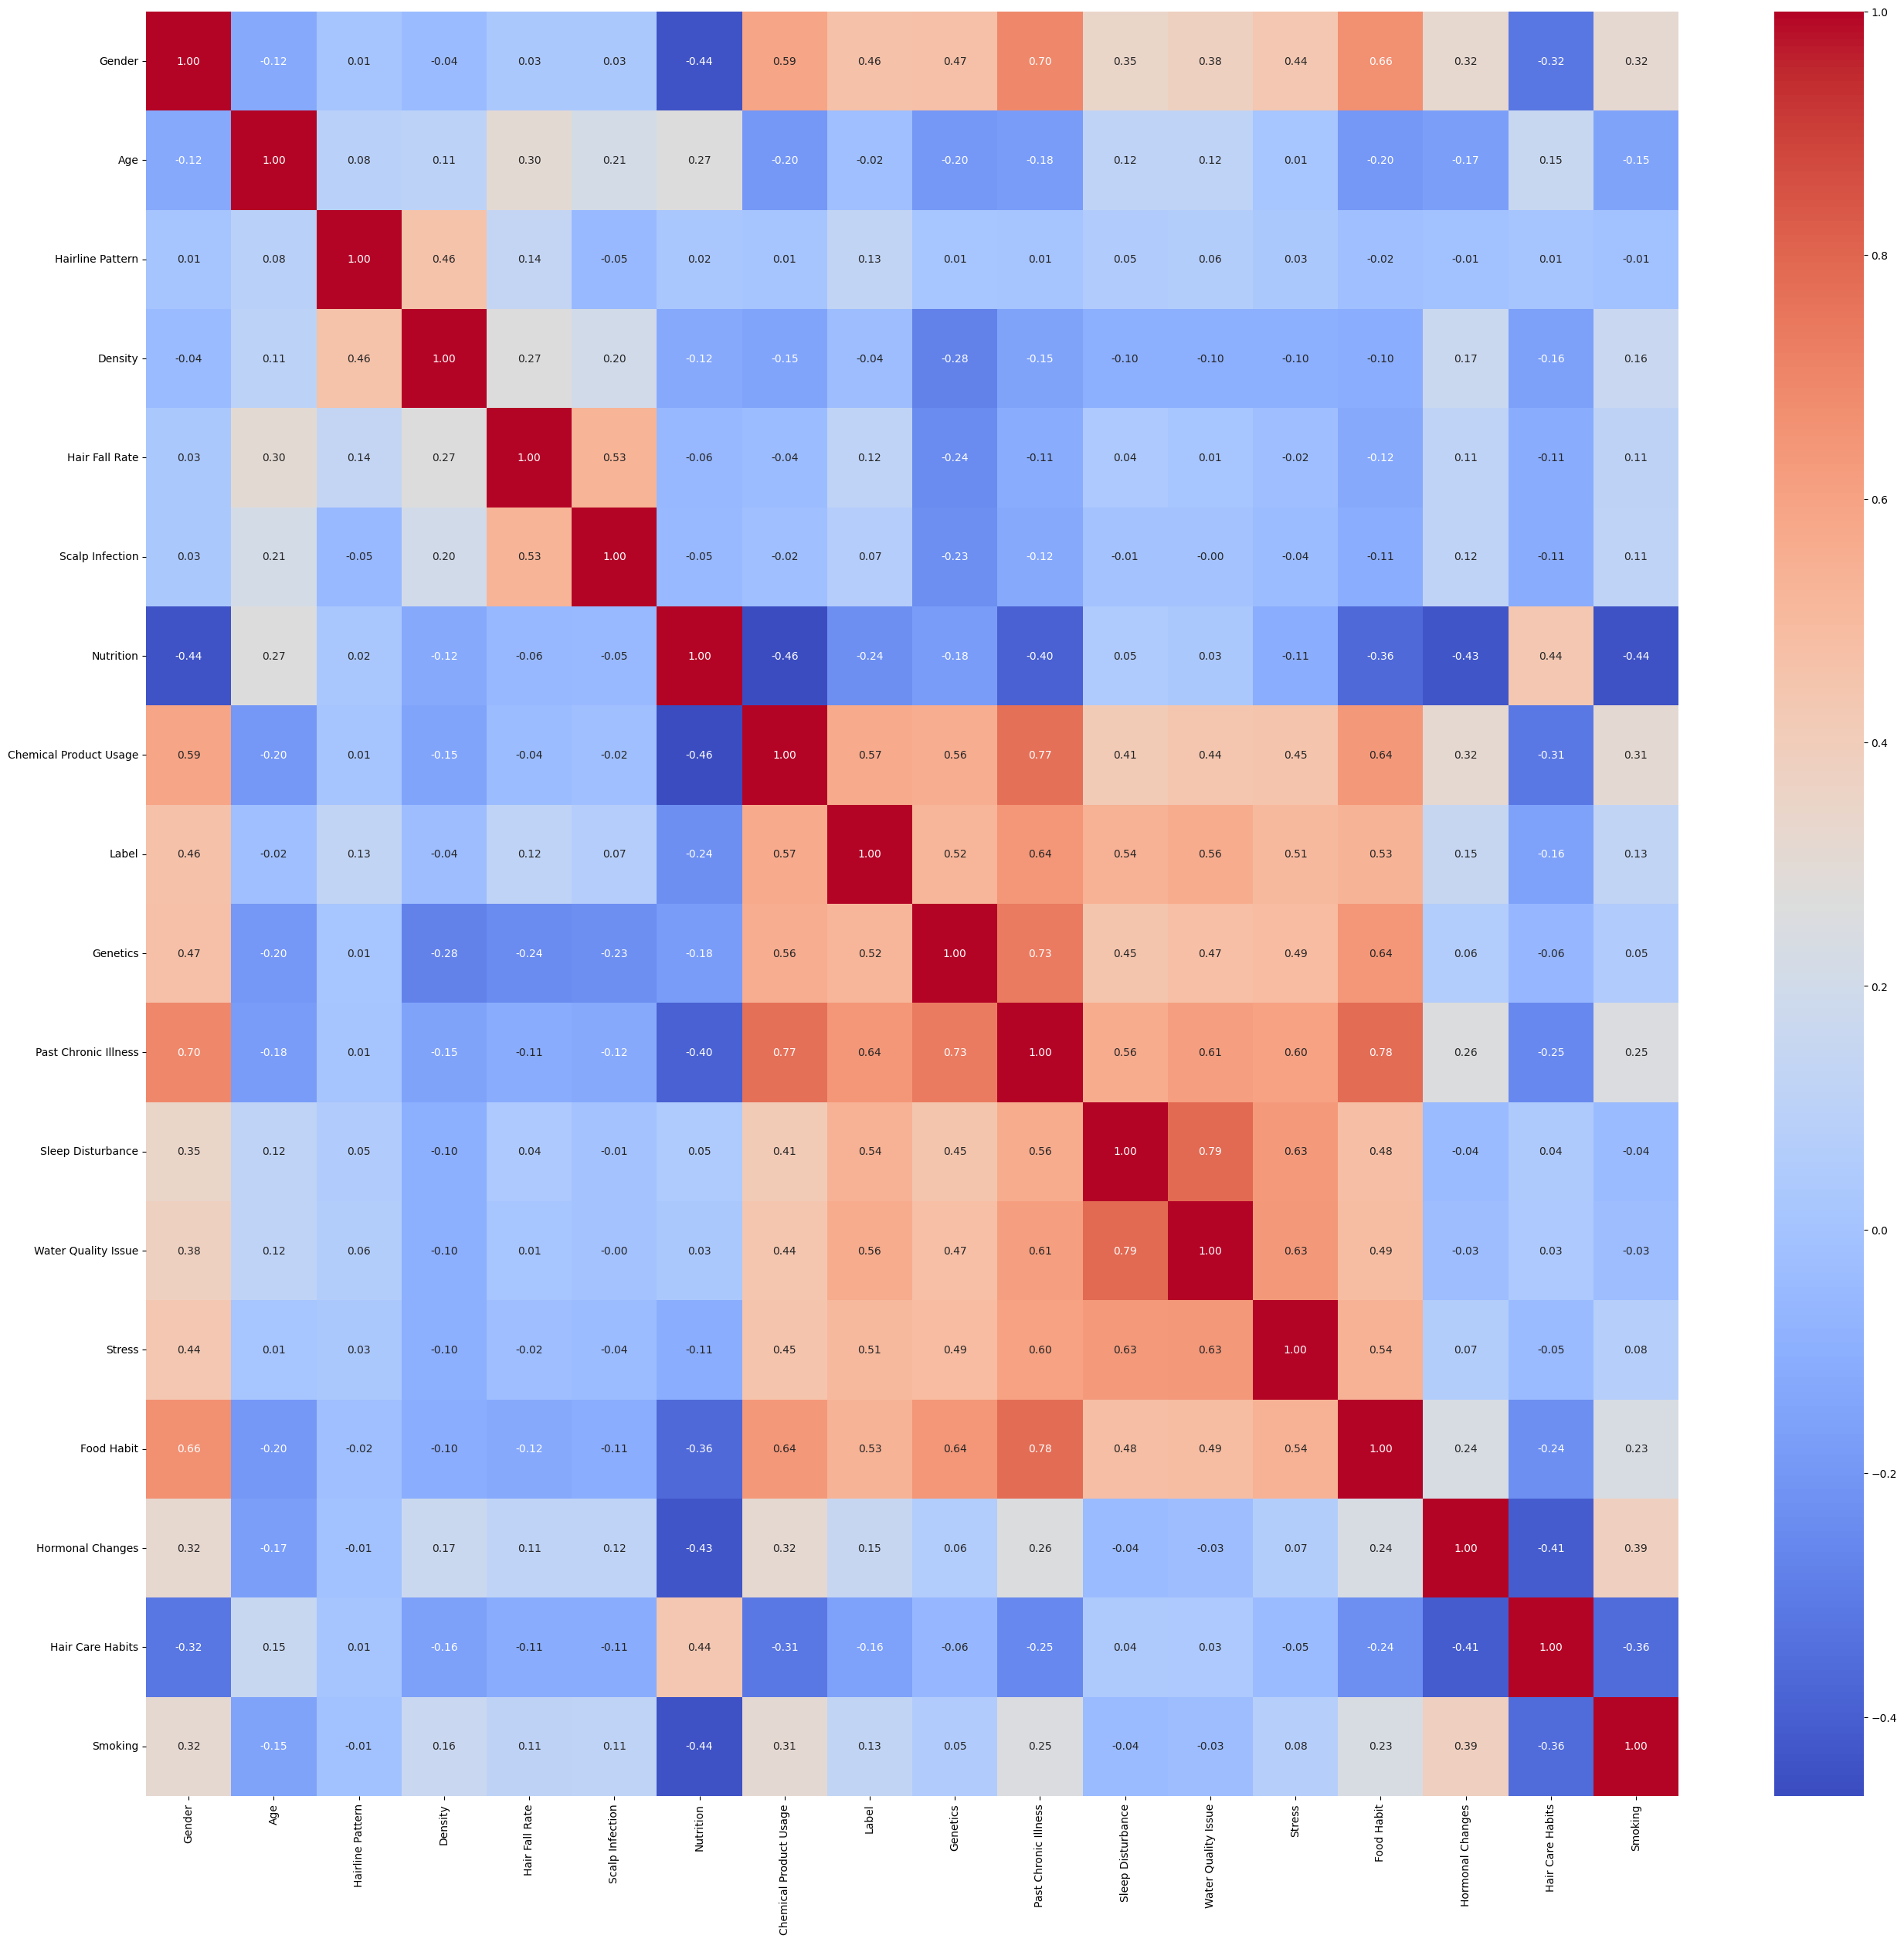

In [285]:
import seaborn as sns

import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = main_data.corr()

# Set the figure size
plt.figure(figsize=(32, 30))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Show the plot
plt.show()

In [286]:
main_data = main_data.astype(int)
main_data.dtypes

Gender                    int32
Age                       int32
Hairline Pattern          int32
Density                   int32
Hair Fall Rate            int32
Scalp Infection           int32
Nutrition                 int32
Chemical Product Usage    int32
Label                     int32
Genetics                  int32
Past Chronic Illness      int32
Sleep Disturbance         int32
Water Quality Issue       int32
Stress                    int32
Food Habit                int32
Hormonal Changes          int32
Hair Care Habits          int32
Smoking                   int32
dtype: object

In [287]:
main_data.columns

Index(['Gender', 'Age', 'Hairline Pattern', 'Density', 'Hair Fall Rate',
       'Scalp Infection', 'Nutrition', 'Chemical Product Usage', 'Label',
       'Genetics', 'Past Chronic Illness', 'Sleep Disturbance',
       'Water Quality Issue', 'Stress', 'Food Habit', 'Hormonal Changes',
       'Hair Care Habits', 'Smoking'],
      dtype='object')

In [288]:
main_data['Hair Fall Rate'].value_counts()

52     21946
40      1353
252      713
50       483
20       437
       ...  
126        7
178        7
210        5
87         4
362        4
Name: Hair Fall Rate, Length: 147, dtype: int64

In [289]:
main_data['Label'].value_counts()

1    14616
0    11715
2     3669
Name: Label, dtype: int64

In [290]:
main_data

,Gender,Age,Hairline Pattern,Density,Hair Fall Rate,Scalp Infection,Nutrition,Chemical Product Usage,Label,Genetics,Past Chronic Illness,Sleep Disturbance,Water Quality Issue,Stress,Food Habit,Hormonal Changes,Hair Care Habits,Smoking
860,1,30,1,0,52,0,0,0,2,1,1,1,1,1,2,1,0,1
1294,0,22,1,0,52,0,0,2,1,0,0,1,0,0,0,1,0,1
1130,0,27,1,0,52,0,0,2,1,0,0,0,1,1,0,1,0,1
1095,1,31,1,0,52,0,0,2,1,0,1,1,1,1,2,1,0,1
1638,0,37,1,0,52,0,8,0,1,0,0,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246,1,18,1,0,52,0,0,2,0,0,0,0,0,0,0,1,0,1
746,1,25,1,0,52,0,0,2,1,0,1,1,1,1,0,1,0,1
1147,1,26,1,0,52,0,0,2,1,1,0,1,1,1,0,1,0,1
1002,0,20,1,0,52,0,0,2,1,1,1,1,1,1,0,1,0,1


In [291]:
main_data.to_csv('final_data.csv', index=False)

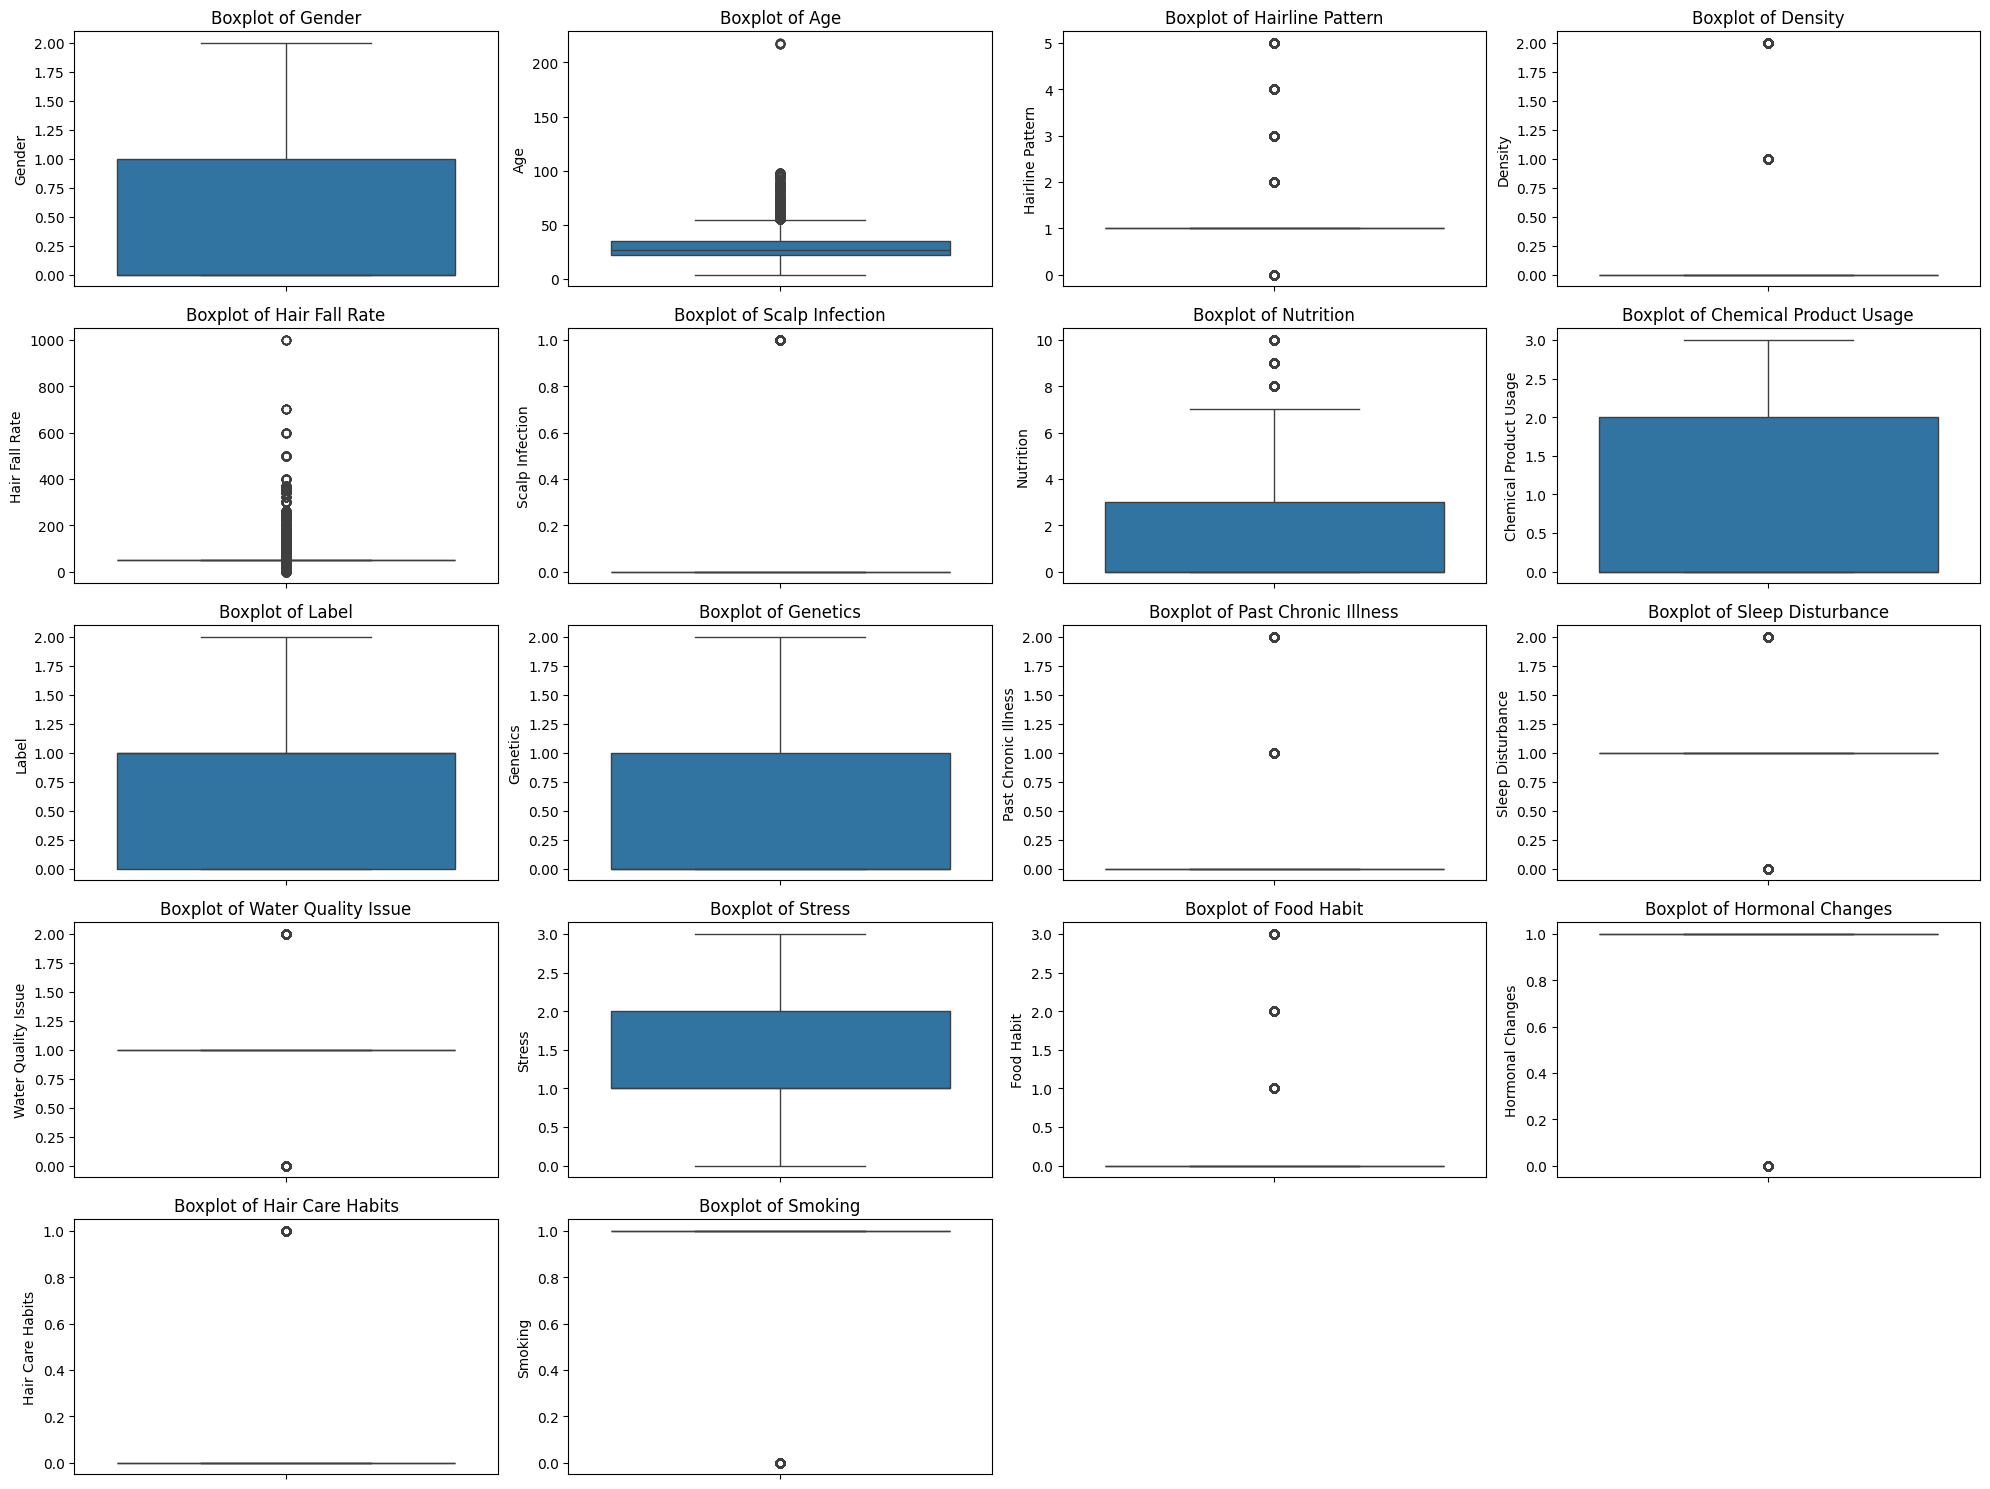

In [292]:
import seaborn as sns

import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(20, 15))

# Create a boxplot for each column
for i, column in enumerate(main_data.columns, 1):
    plt.subplot(5, 4, i)  # Adjust the number of rows and columns as needed
    sns.boxplot(y=main_data[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

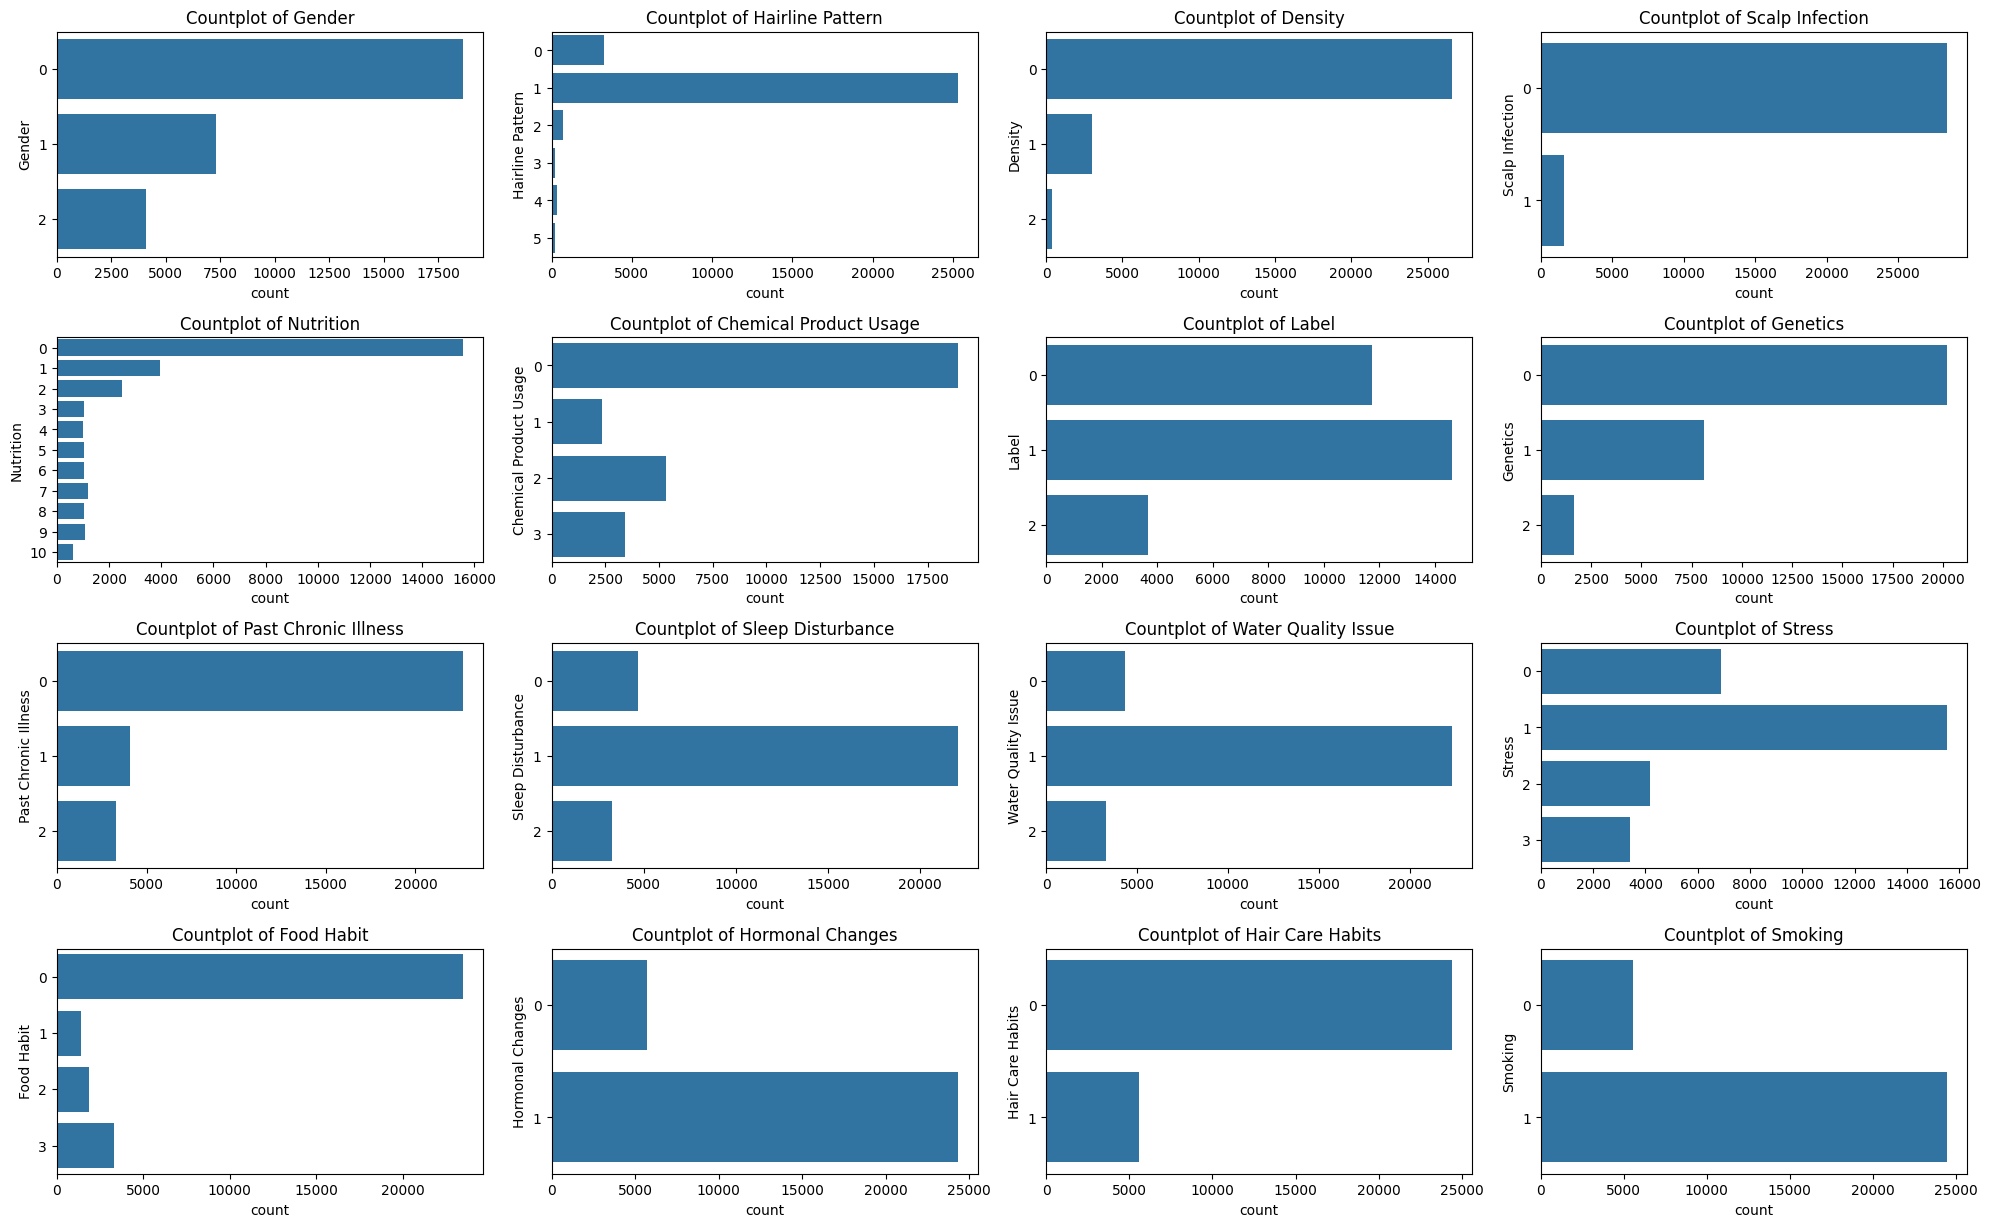

In [293]:
import seaborn as sns

import matplotlib.pyplot as plt

# List of columns to plot
columns_to_plot = [col for col in main_data.columns if col not in ['Age', 'Hair Fall Rate']]

# Set the figure size
plt.figure(figsize=(20, 15))

# Create a count plot for each column
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(5, 4, i)  # Adjust the number of rows and columns as needed
    sns.countplot(y=main_data[column])
    plt.title(f'Countplot of {column}')

plt.tight_layout()
plt.show()

In [294]:
main_data.columns

Index(['Gender', 'Age', 'Hairline Pattern', 'Density', 'Hair Fall Rate',
       'Scalp Infection', 'Nutrition', 'Chemical Product Usage', 'Label',
       'Genetics', 'Past Chronic Illness', 'Sleep Disturbance',
       'Water Quality Issue', 'Stress', 'Food Habit', 'Hormonal Changes',
       'Hair Care Habits', 'Smoking'],
      dtype='object')

In [295]:
main_data.drop(columns=['Scalp Infection', 'Density'], inplace=True)

In [309]:
main_data['Label'].value_counts()

1    14616
0    11715
2     3669
Name: Label, dtype: int64

In [298]:
main_data['Hairline Pattern'] = main_data['Hairline Pattern'] * 2
main_data['Chemical Product Usage'] = main_data['Chemical Product Usage'] * 1.5
main_data['Genetics'] = main_data['Genetics'] * 1.5
main_data['Past Chronic Illness'] = main_data['Past Chronic Illness'] * 1.5
main_data['Hair Care Habits'] = main_data['Hair Care Habits'] * 1.2


In [299]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Important Features (Assigning Higher Weights)
feature_weights = {
    'Hair Fall Rate': 19,  # Very Important Feature
    'Genetics': 2,  # Important
    'Stress': 2,  # Important
    'Hormonal Changes': 2,  # Important
    'Sleep Disturbance': 2,  # Important
}

# Prepare Features and Target
X = main_data.drop('Label', axis=1)  # Features
y = main_data['Label']  # Target variable

# Apply feature importance weights (Multiply Selected Columns)
for feature, weight in feature_weights.items():
    if feature in X.columns:
        X[feature] = X[feature] * weight  # Boost its value

# First split: 80% train, 20% temp (which will be split into validation and test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: 50% validation, 50% test from the temp set
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize SMOTE (to handle class imbalance)
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to generate synthetic samples on the training set only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the resampled training data
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the validation set
y_val_pred = rf_classifier.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_class_report = classification_report(y_val, y_val_pred)

# Display the results for the validation set
print(f"Validation Accuracy: {val_accuracy:.4f}")
print("Validation Classification Report:")
print(val_class_report)

# Predict on the test set
y_test_pred = rf_classifier.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

# Display the results for the test set
print(f"Test Accuracy: {test_accuracy:.4f}")
print("Test Classification Report:")
print(test_class_report)

# Show feature importances
importances = rf_classifier.feature_importances_
feature_importance_dict = dict(zip(X.columns, importances))

print("Feature Importances:", feature_importance_dict)

Validation Accuracy: 0.8817
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1117
           1       0.90      0.88      0.89      1510
           2       0.90      0.85      0.88       373

    accuracy                           0.88      3000
   macro avg       0.88      0.87      0.88      3000
weighted avg       0.88      0.88      0.88      3000

Test Accuracy: 0.8950
Test Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1092
           1       0.91      0.91      0.91      1516
           2       0.90      0.89      0.90       392

    accuracy                           0.90      3000
   macro avg       0.90      0.89      0.89      3000
weighted avg       0.89      0.90      0.89      3000

Feature Importances: {'Gender': 0.038205821230674515, 'Age': 0.18965927626060772, 'Hairline Pattern': 0.02319891587650033, 'Ha

In [300]:
X_train_resampled

,Gender,Age,Hairline Pattern,Hair Fall Rate,Nutrition,Chemical Product Usage,Genetics,Past Chronic Illness,Sleep Disturbance,Water Quality Issue,Stress,Food Habit,Hormonal Changes,Hair Care Habits,Smoking
0,2,27,2,988,0,4.5,3.0,3.0,4,2,6,3,2,0.0,1
1,2,27,2,988,0,4.5,6.0,3.0,4,2,6,3,2,0.0,1
2,0,48,2,988,4,0.0,3.0,0.0,2,1,4,0,0,0.0,1
3,1,20,2,988,0,3.0,0.0,0.0,2,1,0,2,2,0.0,1
4,1,55,0,1900,0,0.0,0.0,0.0,2,1,2,0,2,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34765,2,27,2,988,0,4.5,3.0,3.0,4,2,6,3,2,0.0,1
34766,2,27,2,988,0,4.5,6.0,3.0,4,2,6,3,2,0.0,1
34767,2,27,2,988,0,4.5,6.0,3.0,4,2,6,3,2,0.0,1
34768,2,27,2,988,0,4.5,6.0,3.0,4,2,6,3,2,0.0,1


In [301]:
from sklearn.feature_selection import mutual_info_classif

# Compute Mutual Information
mi = mutual_info_classif(X_train_resampled, y_train_resampled)

# Display MI Scores
for feature, score in zip(X_train_resampled.columns, mi):
    print(f"Feature: {feature}, MI Score: {score}")

Feature: Gender, MI Score: 0.3682887920181488
Feature: Age, MI Score: 0.4055924965192852
Feature: Hairline Pattern, MI Score: 0.04888246704084098
Feature: Hair Fall Rate, MI Score: 0.13664660309557042
Feature: Nutrition, MI Score: 0.12302493816534787
Feature: Chemical Product Usage, MI Score: 0.437623939890859
Feature: Genetics, MI Score: 0.3005871678270895
Feature: Past Chronic Illness, MI Score: 0.4881319335697354
Feature: Sleep Disturbance, MI Score: 0.46518900819626463
Feature: Water Quality Issue, MI Score: 0.47062453412463556
Feature: Stress, MI Score: 0.42587307955869114
Feature: Food Habit, MI Score: 0.46274073799321225
Feature: Hormonal Changes, MI Score: 0.03643523505968305
Feature: Hair Care Habits, MI Score: 0.04597105549182401
Feature: Smoking, MI Score: 0.031496971046807376


In [302]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# # Define the parameter grid for Random Forest
# param_grid_rf = {
#     'n_estimators': [100, 200, 300, 400, 500],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10, 15],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2']
# }

# # Initialize GridSearchCV
# grid_search_rf = GridSearchCV(
#     estimator=RandomForestClassifier(random_state=42),  # Base classifier
#     param_grid=param_grid_rf,
#     cv=3,  # 3-fold cross-validation on the training set
#     scoring='accuracy',  # Metric to optimize
#     n_jobs=-1  # Use all available CPU cores
# )

# # Fit GridSearchCV on the resampled training data
# grid_search_rf.fit(X_train_resampled, y_train_resampled)

# # Print the best parameters and best score (from cross-validation on the training set)
# print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
# print("Best Cross-Validation Accuracy (on Training Set):", grid_search_rf.best_score_)

# # Get the best model from GridSearchCV
# best_rf_model = grid_search_rf.best_estimator_

# # Evaluate the best model on the validation set
# y_val_pred = best_rf_model.predict(X_val)
# print("Validation Set Results:")
# print("Accuracy:", accuracy_score(y_val, y_val_pred))
# print("Classification Report:\n", classification_report(y_val, y_val_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

# # Evaluate the best model on the test set
# y_test_pred = best_rf_model.predict(X_test)
# print("Test Set Results:")
# print("Accuracy:", accuracy_score(y_test, y_test_pred))
# print("Classification Report:\n", classification_report(y_test, y_test_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

In [303]:
main_data['Hair Fall Rate'].value_counts()

52     21946
40      1353
252      713
50       483
20       437
       ...  
126        7
178        7
210        5
87         4
362        4
Name: Hair Fall Rate, Length: 147, dtype: int64

In [304]:
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": rf_classifier.feature_importances_})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# Display top important features
print(feature_importance)

                   Feature  Importance
1                      Age    0.189659
8        Sleep Disturbance    0.111820
7     Past Chronic Illness    0.103825
9      Water Quality Issue    0.102795
5   Chemical Product Usage    0.086512
11              Food Habit    0.074255
3           Hair Fall Rate    0.071626
4                Nutrition    0.065332
10                  Stress    0.062854
0                   Gender    0.038206
6                 Genetics    0.030488
2         Hairline Pattern    0.023199
13        Hair Care Habits    0.017667
12        Hormonal Changes    0.012288
14                 Smoking    0.009472


In [305]:
main_data.columns

Index(['Gender', 'Age', 'Hairline Pattern', 'Hair Fall Rate', 'Nutrition',
       'Chemical Product Usage', 'Label', 'Genetics', 'Past Chronic Illness',
       'Sleep Disturbance', 'Water Quality Issue', 'Stress', 'Food Habit',
       'Hormonal Changes', 'Hair Care Habits', 'Smoking'],
      dtype='object')

### Using XGB BOOST

In [306]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Prepare the data
X = main_data.drop('Label', axis=1)  # Features
y = main_data['Label']  # Target variable

# First split: 80% train, 20% temp (which will be split into validation and test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: 50% validation, 50% test from the temp set
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize SMOTE (to handle class imbalance)
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to generate synthetic samples on the training set only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Train the classifier on the resampled training data
xgb_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the validation set
y_val_pred = xgb_classifier.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_class_report = classification_report(y_val, y_val_pred)

# Display the results for the validation set
print(f"Validation Accuracy: {val_accuracy:.4f}")
print("Validation Classification Report:")
print(val_class_report)

# Predict on the test set
y_test_pred = xgb_classifier.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

# Display the results for the test set
print(f"Test Accuracy: {test_accuracy:.4f}")
print("Test Classification Report:")
print(test_class_report)

Validation Accuracy: 0.8457
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82      1117
           1       0.87      0.84      0.85      1510
           2       0.96      0.85      0.90       373

    accuracy                           0.85      3000
   macro avg       0.87      0.85      0.86      3000
weighted avg       0.85      0.85      0.85      3000

Test Accuracy: 0.8663
Test Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1092
           1       0.89      0.86      0.88      1516
           2       0.97      0.89      0.93       392

    accuracy                           0.87      3000
   macro avg       0.89      0.87      0.88      3000
weighted avg       0.87      0.87      0.87      3000



In [316]:
main_data

,Gender,Age,Hairline Pattern,Hair Fall Rate,Nutrition,Chemical Product Usage,Label,Genetics,Past Chronic Illness,Sleep Disturbance,Water Quality Issue,Stress,Food Habit,Hormonal Changes,Hair Care Habits,Smoking
860,1,30,2,52,0,0.0,2,1.5,1.5,1,1,1,2,1,0.0,1
1294,0,22,2,52,0,3.0,1,0.0,0.0,1,0,0,0,1,0.0,1
1130,0,27,2,52,0,3.0,1,0.0,0.0,0,1,1,0,1,0.0,1
1095,1,31,2,52,0,3.0,1,0.0,1.5,1,1,1,2,1,0.0,1
1638,0,37,2,52,8,0.0,1,0.0,0.0,1,1,0,0,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246,1,18,2,52,0,3.0,0,0.0,0.0,0,0,0,0,1,0.0,1
746,1,25,2,52,0,3.0,1,0.0,1.5,1,1,1,0,1,0.0,1
1147,1,26,2,52,0,3.0,1,1.5,0.0,1,1,1,0,1,0.0,1
1002,0,20,2,52,0,3.0,1,1.5,1.5,1,1,1,0,1,0.0,1


## PREDICTION


In [317]:
import numpy as np

def predict_hair_fall_risk(model, scaler):
    """
    Asks for user input, predicts hair fall risk level, and estimates the future age when hair fall might start.
    
    Parameters:
    model: Trained RandomForestClassifier model
    scaler: Scaler used to normalize features (if needed)
    
    Returns:
    None (Prints Risk Level and Predicted Age of Onset)
    """
    
    # Define expected features
    feature_order = ['Gender', 'Age', 'Hairline Pattern', 'Hair Fall Rate', 'Nutrition',
                     'Chemical Product Usage', 'Genetics', 'Past Chronic Illness',
                     'Sleep Disturbance', 'Water Quality Issue', 'Stress', 'Food Habit',
                     'Hormonal Changes', 'Hair Care Habits', 'Smoking']
    
    # Ask for user input
    user_input = {}
    print("Please enter the following details:")
    user_input['Gender'] = int(input("Gender (0 for Female, 1 for Male): "))
    user_input['Age'] = int(input("Current Age: "))
    user_input['Hairline Pattern'] = int(input("Hairline Pattern (0 for Normal, 1 for Receding): "))
    user_input['Hair Fall Rate'] = float(input("Hair Fall Rate (50 to 150 strands per day): "))
    user_input['Nutrition'] = float(input("Nutrition Level (1 to 10, 10 being excellent): "))
    user_input['Chemical Product Usage'] = int(input("Frequent Chemical Product Usage (0 for No, 1 for Yes): "))
    user_input['Genetics'] = int(input("Family History of Hair Loss (0 for No, 1 for Yes): "))
    user_input['Past Chronic Illness'] = int(input("Past Chronic Illness (0 for No, 1 for Yes): "))
    user_input['Sleep Disturbance'] = int(input("Sleep Disturbance (0 for No, 1 for Yes): "))
    user_input['Water Quality Issue'] = int(input("Poor Water Quality (0 for No, 1 for Yes): "))
    user_input['Stress'] = int(input("High Stress Levels (0 for No, 1 for Yes): "))
    user_input['Food Habit'] = int(input("Unhealthy Food Habit (0 for No, 1 for Yes): "))
    user_input['Hormonal Changes'] = int(input("Hormonal Imbalance (0 for No, 1 for Yes): "))
    user_input['Hair Care Habits'] = int(input("Poor Hair Care Habits (0 for No, 1 for Yes): "))
    user_input['Smoking'] = int(input("Smoking (0 for No, 1 for Yes): "))
    
    # Convert user input into a feature array
    user_data = np.array([[user_input[feature] for feature in feature_order]])
    
    # Scale data if a scaler is provided
    if scaler:
        user_data = scaler.transform(user_data)
    
    # Make prediction
    prediction = model.predict(user_data)[0]
    
    # Map numerical prediction to user-friendly categories
    risk_mapping = {0: "Low Risk", 1: "Medium Risk", 2: "High Risk"}
    risk_level = risk_mapping.get(prediction, "Unknown")
    
    # --- Updated Age Prediction ---
    age = user_input["Age"]
    hair_fall_rate = user_input["Hair Fall Rate"]
    
    # Normalize hair fall rate (50-150 → 0-1 scale)
    normalized_hair_fall = (hair_fall_rate - 50) / 100
    
    # Feature importance weights (Adjust as needed)
    feature_weights = {
        "Sleep Disturbance": 0.114,
        "Water Quality Issue": 0.101,
        "Past Chronic Illness": 0.099,
        "Chemical Product Usage": 0.088,
        "Stress": 0.068,
        "Food Habit": 0.070,
        "Nutrition": 0.067
    }

    # Compute additional impact from features
    additional_factors = (
        user_input["Sleep Disturbance"] * feature_weights["Sleep Disturbance"] +
        user_input["Water Quality Issue"] * feature_weights["Water Quality Issue"] +
        user_input["Past Chronic Illness"] * feature_weights["Past Chronic Illness"] +
        user_input["Chemical Product Usage"] * feature_weights["Chemical Product Usage"] +
        user_input["Stress"] * feature_weights["Stress"] +
        user_input["Food Habit"] * feature_weights["Food Habit"] +
        (1 - (user_input["Nutrition"] / 10)) * feature_weights["Nutrition"]  # Poor nutrition worsens risk
    )

    # Adjust age prediction based on risk level
    if risk_level == "High Risk":
        predicted_age = age + (1 + (5 - 1) * (1 - normalized_hair_fall)) - additional_factors * 5
        predicted_age = max(predicted_age, age)  # Prevent negative age predictions

    elif risk_level == "Medium Risk":
        predicted_age = age + (5 + (9 - 5) * (1 - normalized_hair_fall)) - additional_factors * 4
        predicted_age = max(predicted_age, age + 5)

    elif risk_level == "Low Risk":
        predicted_age = age + (10 + (15 - 10) * (1 - normalized_hair_fall)) - additional_factors * 3
        print("\n🟢 Low Risk: Hair fall is not an immediate concern, but proper care is needed to maintain healthy hair.")

    print(f"\nPredicted Hair Fall Risk: {risk_level}")
    print(f"Estimated Age When Hair Fall Might Start: {predicted_age:.2f}")

# Example usage:
# predict_hair_fall_risk(trained_model, None)


In [318]:
predict_hair_fall_risk(rf_classifier, None)

Please enter the following details:

Predicted Hair Fall Risk: High Risk
Estimated Age When Hair Fall Might Start: 21.67


c:\Users\Nitro\anaconda3\envs\test_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
